<a href="https://colab.research.google.com/github/Riza-sunesara/YoungDevInterns_Artificial_Intelligence_Tasks/blob/main/Basic_Tasks/Basic_Task01/Basic_Task01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Connecting to Github**


In [28]:
!git clone https://github.com/Riza-sunesara/YoungDevInterns_Artificial_Intelligence_Tasks.git

Cloning into 'YoungDevInterns_Artificial_Intelligence_Tasks'...
remote: Enumerating objects: 106, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (73/73), done.
remote: Total 106 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (106/106), 23.93 MiB | 13.83 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [29]:
%cd YoungDevInterns_Artificial_Intelligence_Tasks/Basic_Tasks/Basic_Task01/

/content/YoungDevInterns_Artificial_Intelligence_Tasks/Basic_Tasks/Basic_Task01/YoungDevInterns_Artificial_Intelligence_Tasks/Basic_Tasks/Basic_Task01


# **Working on Task 01**

## **Retrieving the dataset from github and implementing model**


In [30]:
# Importing all libraries required
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [31]:
# Raw URL for the csv file
url = 'https://github.com/Riza-sunesara/YoungDevInterns_Artificial_Intelligence_Tasks/raw/refs/heads/main/Basic_Tasks/Basic_Task01/cardata.csv'

# Read the csv file from the URL
data = pd.read_csv(url)

# Display the first few rows to verify
data.head()


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [32]:
X = data[['Present_Price']]  # Feature: 2D DataFrame
y = data['Selling_Price']    # Label: 1D Series

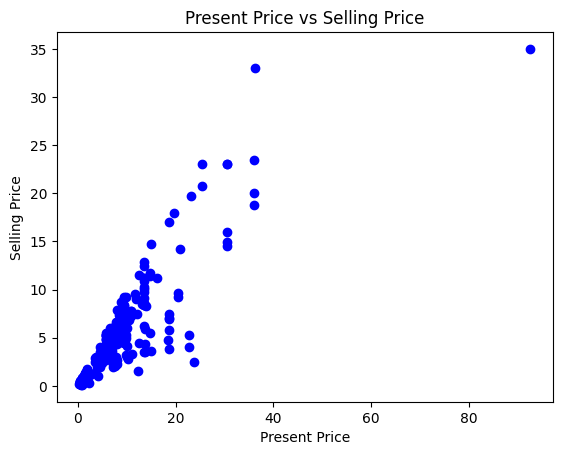

In [33]:
# Step 2: Visualize relationship
plt.scatter(X, y, color='blue')
plt.title("Present Price vs Selling Price")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.show()

In [34]:
# Split the training and testing data and apply model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [35]:
# Predicting:
y_pred = model.predict(X_test)

In [36]:
# Evaluating the model:
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Mean Squared Error: 7.202032610310123
R² Score: 0.6873518619001651


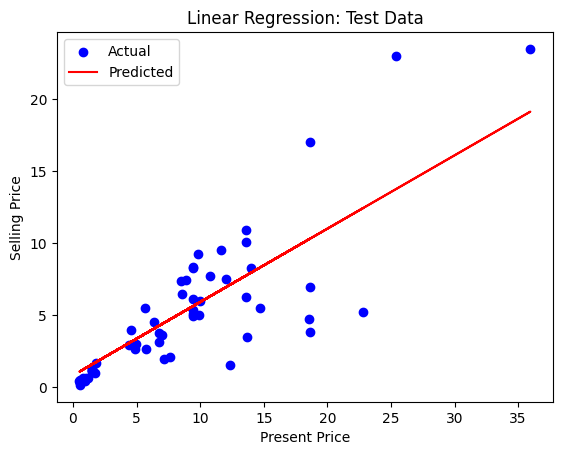

In [37]:
# Visualizing predictions:
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', label='Predicted')
plt.title("Linear Regression: Test Data")
plt.xlabel("Present Price")
plt.ylabel("Selling Price")
plt.legend()
plt.show()

## **To Conclude:**
These results tell that using "*Present_Price*" as the single feature to predict "*Selling_Price*" by ***Simple Linear Regression***, the model achieved an **R² score of 0.687** and a **Mean Squared Error of 7.20**, indicating a reasonably strong linear relationship between the current market price of a vehicle and its resale value.